In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("47.csv")

In [4]:
df.head(10)

,gender,race,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,179.0,177.0,182.0
1,female,group A,master's degree,free/reduced,none,176.0,195.0,196.0
2,male,group B,master's degree,free/reduced,none,197.0,195.0,193.0
3,male,group B,bachelor's degree,free/reduced,none,154.0,162.0,152.0
4,male,group E,some high school,free/reduced,none,199.0,183.0,183.0
5,male,group C,associate's degree,free/reduced,none,178.0,188.0,186.0
6,female,group E,associate's degree,free/reduced,completed,195.0,195.0,200.0
7,female,group B,bachelor's degree,free/reduced,none,147.0,148.0,115.0
8,female,group E,associate's degree,free/reduced,none,171.0,169.0,120.0
9,male,group E,bachelor's degree,free/reduced,completed,184.0,165.0,158.0


In [5]:
df.describe()

,math score,reading score,writing score
count,997.000000,1000.000000,996.000000
mean,171.002006,172.398000,173.106426
std,17.668466,17.314369,18.113176
min,100.000000,103.000000,101.000000
25%,161.000000,163.000000,163.000000
50%,172.000000,175.000000,176.000000
75%,183.000000,184.000000,186.000000
max,200.000000,200.000000,200.000000


In [6]:
df.dtypes

gender                          object
race                            object
parental level of education     object
lunch                           object
test preparation course         object
math score                     float64
reading score                  float64
writing score                  float64
dtype: object

In [7]:
df['percentage']=(df['math score']+df['reading score']+df['writing score'])/3 -100
df.describe()
#making a column percentage

,math score,reading score,writing score,percentage
count,997.000000,1000.000000,996.000000,994.000000
mean,171.002006,172.398000,173.106426,72.197518
std,17.668466,17.314369,18.113176,14.364117
min,100.000000,103.000000,101.000000,15.666667
25%,161.000000,163.000000,163.000000,62.333333
50%,172.000000,175.000000,176.000000,73.500000
75%,183.000000,184.000000,186.000000,82.583333
max,200.000000,200.000000,200.000000,100.000000


In [8]:
nan=df.isna()
nanc=nan.any()
nanc
#checking which columns have null values

gender                         False
race                           False
parental level of education     True
lunch                          False
test preparation course        False
math score                      True
reading score                  False
writing score                   True
percentage                      True
dtype: bool

In [9]:
df=df.dropna(subset=['parental level of education'])
#dropping all rows having null values

In [10]:
nan=df.isna()
nanc=nan.any()
nanc
#checking null values in numerical datas

gender                         False
race                           False
parental level of education    False
lunch                          False
test preparation course        False
math score                      True
reading score                  False
writing score                   True
percentage                      True
dtype: bool

In [11]:
df['math score'].fillna(df['math score'].mean(),inplace=True)
df['writing score'].fillna(df['writing score'].mean(),inplace=True)
df['percentage'].fillna(df['percentage'].mean(),inplace=True)
#changing all null numerical values

In [12]:
nan=df.isna()
nanc=nan.any()
nanc
#checking null values 

gender                         False
race                           False
parental level of education    False
lunch                          False
test preparation course        False
math score                     False
reading score                  False
writing score                  False
percentage                     False
dtype: bool

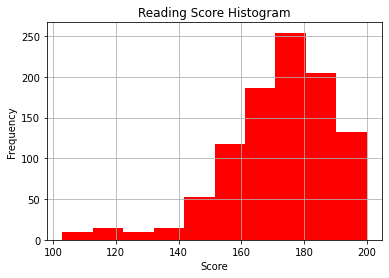

In [13]:
df['reading score'].hist(histtype='stepfilled', color='red')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Reading Score Histogram')
plt.show()
# the graph shows normal distribution 
# the graph is left skewed
# f(x)= (1/(sigma*sqrt{2*pi}))*e^((-1/2)*({x-mu}/{sigma})^2)
# A left-skewed, negative distribution will have the mean to the left of the median.
# A left-skewed distribution has a long left tail. Left-skewed distributions are also called negatively-skewed distributions.

In [14]:
grade=list()
for i in df['percentage']:
    if(i>90):
        grade.append('S')
    elif(i>80 and i<=90):
        grade.append('A')
    elif(i>70 and i<=80):
        grade.append('B')
    elif(i>60 and i<=70):
        grade.append('C')
    elif(i>40 and i<=60):
        grade.append('D')
    else:
        grade.append('F')
grade
df['grade']=grade
df
#adding grades to the dataframe

,gender,race,parental level of education,lunch,test preparation course,math score,reading score,writing score,percentage,grade
0,female,group B,bachelor's degree,standard,none,179.0,177.0,182.0,79.333333,B
1,female,group A,master's degree,free/reduced,none,176.0,195.0,196.0,89.000000,A
2,male,group B,master's degree,free/reduced,none,197.0,195.0,193.0,95.000000,S
3,male,group B,bachelor's degree,free/reduced,none,154.0,162.0,152.0,56.000000,D
4,male,group E,some high school,free/reduced,none,199.0,183.0,183.0,88.333333,A
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,bachelor's degree,free/reduced,none,195.0,199.0,129.0,74.333333,B
996,female,group B,high school,standard,completed,138.0,143.0,163.0,48.000000,D
997,female,group A,associate's degree,free/reduced,none,166.0,176.0,173.0,71.666667,B
998,male,group E,high school,free/reduced,completed,175.0,183.0,185.0,81.000000,A


In [15]:
df['parental level of education'].value_counts()

associate's degree    520
high school           151
bachelor's degree     151
some high school       98
master's degree        45
some college           29
Name: parental level of education, dtype: int64

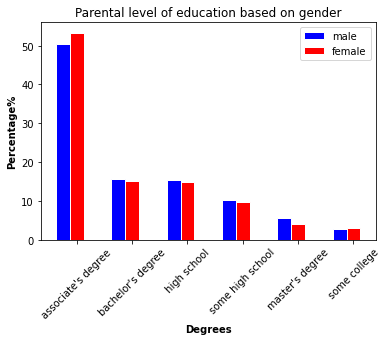

In [16]:
male=df[df['gender']=='male']['parental level of education']
female=df[df['gender']=='female']['parental level of education']
male_counts = male.value_counts(normalize=True)
female_count=female.value_counts(normalize=True)
male_counts=male_counts*100
female_count=female_count*100
mc=list(male_counts)
fc=list(female_count)
labels=['associate\'s degree','bachelor\'s degree','high school','some high school','master\'s degree','some college']
barWidth = 0.25
r1=np.arange(len(mc))
r2=[x+barWidth for x in r1]
plt.bar(r1, mc, color='blue', width=barWidth, edgecolor='white', label='male')
plt.bar(r2, fc, color='red', width=barWidth, edgecolor='white', label='female')
plt.xlabel('Degrees', fontweight='bold')
plt.ylabel('Percentage%',fontweight='bold')
plt.title('Parental level of education based on gender')
plt.xticks([r + barWidth for r in range(len(mc))], labels,rotation=45)
plt.legend()
plt.show()
#creating a graph for display for degree with percentage a grouped bar chart

In [17]:
srs=df.sample(n=100)
srs
#simple random sampling

,gender,race,parental level of education,lunch,test preparation course,math score,reading score,writing score,percentage,grade
121,male,group C,associate's degree,free/reduced,none,198.0,194.0,150.0,80.666667,A
929,female,group D,associate's degree,free/reduced,none,155.0,161.0,159.0,58.333333,D
159,female,group C,associate's degree,free/reduced,none,149.0,167.0,172.0,62.666667,C
384,female,group C,bachelor's degree,free/reduced,none,145.0,148.0,151.0,48.000000,D
859,female,group B,associate's degree,free/reduced,none,194.0,178.0,180.0,84.000000,A
...,...,...,...,...,...,...,...,...,...,...
985,female,group E,associate's degree,free/reduced,none,164.0,156.0,162.0,60.666667,C
936,female,group E,some high school,free/reduced,none,105.0,180.0,161.0,48.666667,D
565,female,group E,bachelor's degree,free/reduced,completed,155.0,148.0,168.0,57.000000,D
560,female,group C,master's degree,standard,completed,181.0,180.0,187.0,82.666667,A


In [18]:
strati=df.groupby('race', group_keys=False).apply(lambda x: x.sample(20))
strati
#stratified sampling

,gender,race,parental level of education,lunch,test preparation course,math score,reading score,writing score,percentage,grade
930,male,group A,associate's degree,free/reduced,none,102.0,179.0,124.0,35.000000,F
81,male,group A,high school,free/reduced,completed,156.0,150.0,153.0,53.000000,D
723,female,group A,high school,free/reduced,completed,127.0,153.0,150.0,43.333333,D
484,male,group A,associate's degree,free/reduced,none,156.0,157.0,162.0,58.333333,D
359,female,group A,high school,standard,none,187.0,195.0,189.0,90.333333,S
...,...,...,...,...,...,...,...,...,...,...
184,female,group E,associate's degree,free/reduced,none,152.0,157.0,157.0,55.333333,D
6,female,group E,associate's degree,free/reduced,completed,195.0,195.0,200.0,96.666667,S
329,female,group E,master's degree,standard,none,148.0,160.0,159.0,55.666667,D
591,female,group E,bachelor's degree,standard,completed,178.0,167.0,158.0,67.666667,C


In [19]:
simple_mean=srs['math score'].mean()
simple_mean
# srs mean

171.68

In [20]:
strati_mean=strati['math score'].mean()
strati_mean
#stratified mean

167.95

In [21]:
df_mean=df['math score'].mean()
print(abs(df_mean-simple_mean))#error in simple random sampling
print(abs(df_mean-strati_mean))#error in stratified random sampling
#error is low in simple random sampling error

0.675963673057538
3.05403632694248


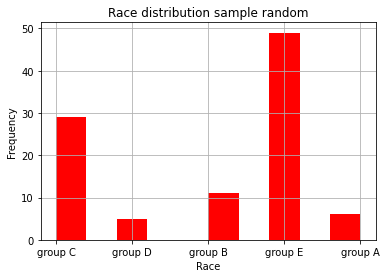

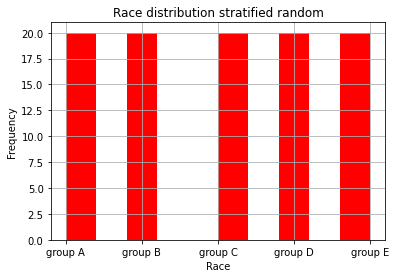

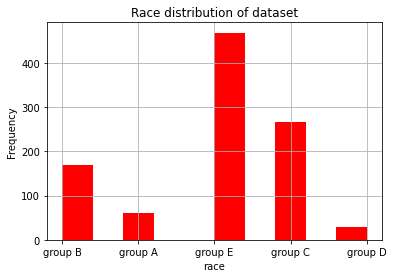

In [24]:
#plottiong a histogram for simple random sampling
srs['race'].hist(histtype='stepfilled', color='red')
plt.xlabel('Race')
plt.ylabel('Frequency')
plt.title('Race distribution sample random')
plt.show()

#plotting a histogram for stratified sampling
strati['race'].hist(histtype='stepfilled', color='red')
plt.xlabel('Race')
plt.ylabel('Frequency')
plt.title('Race distribution stratified random')
plt.show()

#plotting a histogram for the dataframe
df['race'].hist(histtype='stepfilled', color='red')
plt.xlabel('race')
plt.ylabel('Frequency')
plt.title('Race distribution of dataset')
plt.show()


# we infered that simple random sampling has very random selection from all groups
# The stratified sampling gives us 20 ppl from each group thus making it equal spread
# the data set sampling shows that there are many ppl from group E and least from group A
# from the graphs of srs and data set we can saw that almost like propostion of data is getting selected based of race

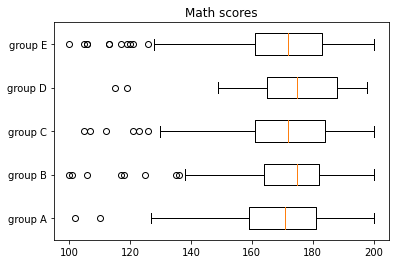

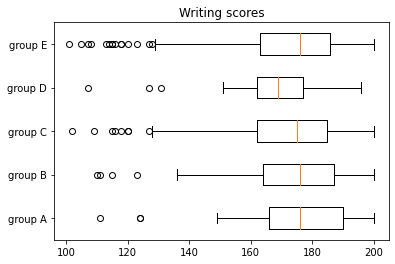

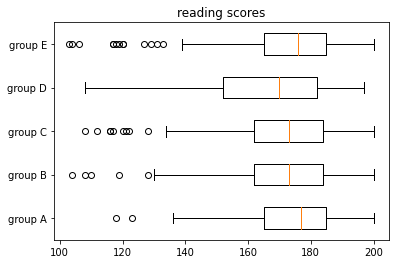

In [25]:
# box plot for math scores
gam=df[df['race']=='group A']['math score']
gbm=df[df['race']=='group B']['math score']
gcm=df[df['race']=='group C']['math score']
gdm=df[df['race']=='group D']['math score']
gem=df[df['race']=='group E']['math score']
values=[gam,gbm,gcm,gdm,gem]
plt.boxplot(values, vert=False,labels=['group A','group B','group C','group D','group E'])   
plt.title("Math scores")
plt.show()

#box plot for writing scores
gaw=df[df['race']=='group A']['writing score']
gbw=df[df['race']=='group B']['writing score']
gcw=df[df['race']=='group C']['writing score']
gdw=df[df['race']=='group D']['writing score']
gew=df[df['race']=='group E']['writing score']
values1=[gaw,gbw,gcw,gdw,gew]
plt.boxplot(values1, vert=False,labels=['group A','group B','group C','group D','group E'])   
plt.title("Writing scores")
plt.show()

#box plot for reading scores
gar=df[df['race']=='group A']['reading score']
gbr=df[df['race']=='group B']['reading score']
gcr=df[df['race']=='group C']['reading score']
gdr=df[df['race']=='group D']['reading score']
ger=df[df['race']=='group E']['reading score']
values=[gar,gbr,gcr,gdr,ger]
plt.boxplot(values, vert=False,labels=['group A','group B','group C','group D','group E'])   
plt.title("reading scores")
plt.show()


# from the box plots we can say that maximum number of outliers are from group E race considering all 3 scores
# for maths scores Group E has maximum no of outliers 
# for writing scores group E has maximum no of outliers
# for reading scores group E has maximum no of outliers